<a href="https://colab.research.google.com/github/hongseoi/data_analysis/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%B0%8F%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> 22-2 머신러닝 및 딥러닝 프로젝트</h1>
<right>2016110838 행정학전공 홍서이</right>

<h2>Import Necessary Libraries</h2>

In [2]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os
import pandas as pd


# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#머신러닝 모델
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm, tree
import xgboost
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import warnings
warnings.filterwarnings('ignore')

<h2>Load dataset</h2>

In [4]:
from google.colab import drive
df = pd.read_csv("/content/drive/MyDrive/머신러닝 딥러닝/BC-TCGA/cancer_calssification.csv")

In [5]:
print("원본 데이터프레임의 shape:", df.shape)

원본 데이터프레임의 shape: (590, 17815)


In [6]:
df.head()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,label
0,0.610333,1.7550,0.403875,0.50325,-0.142167,-2.16950,0.136833,0.92325,-1.794625,0.2430,...,-0.24350,0.497833,0.8185,0.3025,1.29675,1.2892,-0.5119,-0.6990,-1.2582,1
1,0.055917,0.2450,0.337125,-0.41175,-0.550667,0.18475,-0.130000,-0.75300,-1.761750,0.8385,...,-0.30825,0.442833,0.5122,0.0720,-0.23900,-1.5816,0.3353,-0.6710,-0.7560,1
2,0.785583,1.1935,0.314375,0.41350,1.010333,-1.56675,-0.032833,0.20050,-2.331125,0.3570,...,0.03375,-2.050333,0.6220,0.5050,2.28600,0.7489,-0.9061,-0.9975,-2.0423,1
3,0.232667,0.0055,0.745750,0.29400,0.168833,-1.59375,-0.757667,-0.22975,-1.751250,0.6600,...,-0.06150,-0.783000,0.3127,0.5840,2.11200,-1.7819,0.1767,-0.5855,-0.0038,1
4,0.286917,1.1100,0.209750,-0.01525,0.813000,-1.89900,-0.470500,0.13575,0.225500,0.4495,...,-0.58900,-0.696667,0.2998,0.1775,2.38250,2.0968,-0.4367,2.3375,-1.0420,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Columns: 17815 entries, ELMO2 to label
dtypes: float64(17814), int64(1)
memory usage: 80.2 MB


In [8]:
df['label'].value_counts()

1    529
0     61
Name: label, dtype: int64

<h2>테스트 세트 만들기</h2>

In [9]:
# target feature과 feature 분리
x = df.loc[:,df.columns != 'label']
y = df['label']

In [10]:
# trainset, testset 분리
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True)


In [11]:
# target feature 포함한 train 데이터셋 생성
df_train = pd.concat([X_train, y_train],axis=1)
print(df_train.shape)
df_train.head()

(472, 17815)


,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,label
528,-0.061833,1.31525,0.550875,0.06025,1.558500,-1.08775,0.145667,0.27025,0.090875,0.3090,...,-0.22650,-0.585333,-0.2514,0.4725,2.44775,0.0991,-0.2535,1.6090,0.2641,1
448,0.456500,1.03925,0.688500,0.17425,1.510500,-1.68025,0.054833,0.24775,-1.434625,0.0735,...,-0.12250,-0.067167,-0.1073,0.2835,2.34250,0.4640,0.0416,-0.2670,-0.2583,1
61,-0.143167,1.01800,0.700750,-0.08800,-0.620000,2.57250,-0.931500,0.43075,-1.105375,0.0135,...,0.01750,0.128000,0.3342,-0.0405,1.94775,-1.3584,0.4528,-0.7165,2.1211,1
385,0.909833,0.72400,0.176375,1.41425,-0.323167,-1.71525,-0.511000,-0.26125,-1.842500,0.1010,...,-0.28000,0.573333,0.6149,0.9200,1.73375,4.1329,0.7088,-0.9490,-0.4696,1
396,1.421333,0.40500,0.448375,0.75800,0.243167,-1.80325,-0.494333,-0.24600,0.374750,0.7505,...,-0.07275,-0.532667,0.4463,0.4170,1.63500,-0.0426,0.2465,-0.5985,0.2782,1


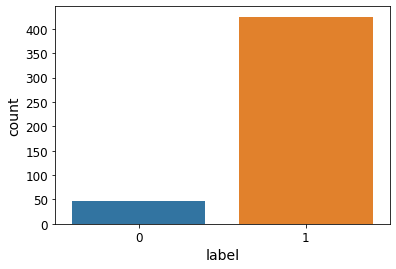

In [12]:
sns.countplot(x='label',data=df_train)

<h2>EDA</h2>

In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ELMO2,472.0,0.247382,0.543297,-1.524917,-0.126417,0.235417,0.585250,2.901167
CREB3L1,472.0,0.836729,0.845563,-1.412750,0.217062,0.853250,1.427125,3.220250
RPS11,472.0,0.480436,0.517137,-0.708875,0.119125,0.449063,0.780438,2.522000
PNMA1,472.0,0.049813,0.623826,-1.726250,-0.364313,0.105500,0.466250,1.800500
MMP2,472.0,0.352651,0.947050,-2.284667,-0.312292,0.417667,1.036917,3.825667
...,...,...,...,...,...,...,...,...
SLC39A6,472.0,0.608732,1.815420,-3.713800,-0.780325,0.472900,1.932900,4.755900
SNRPD2,472.0,0.039163,0.433822,-1.500000,-0.251925,0.011150,0.283225,1.862000
AQP7,472.0,0.094728,1.459088,-2.528000,-0.849375,-0.429750,0.672125,5.615000
CTSC,472.0,-0.227155,0.856916,-2.117900,-0.845825,-0.302550,0.312550,2.364500


In [14]:
df_train['label'].value_counts(normalize=True)

1    0.900424
0    0.099576
Name: label, dtype: float64

In [15]:
#target feature 범주형으로 전환
df_train['label'] = df['label'].astype('category')

<h2>결측치 처리</h2>

In [16]:
#결측치 확인
df_train.isnull().sum().sort_values(ascending=False)


LCE1B      16
DEFB127    13
LHX5       13
RPE65      12
OR4N5      12
           ..
AOF2        0
LRPPRC      0
ACVR1C      0
TM4SF18     0
label       0
Length: 17815, dtype: int64

Text(0.5, 1.0, 'Total Missing Value (%)')

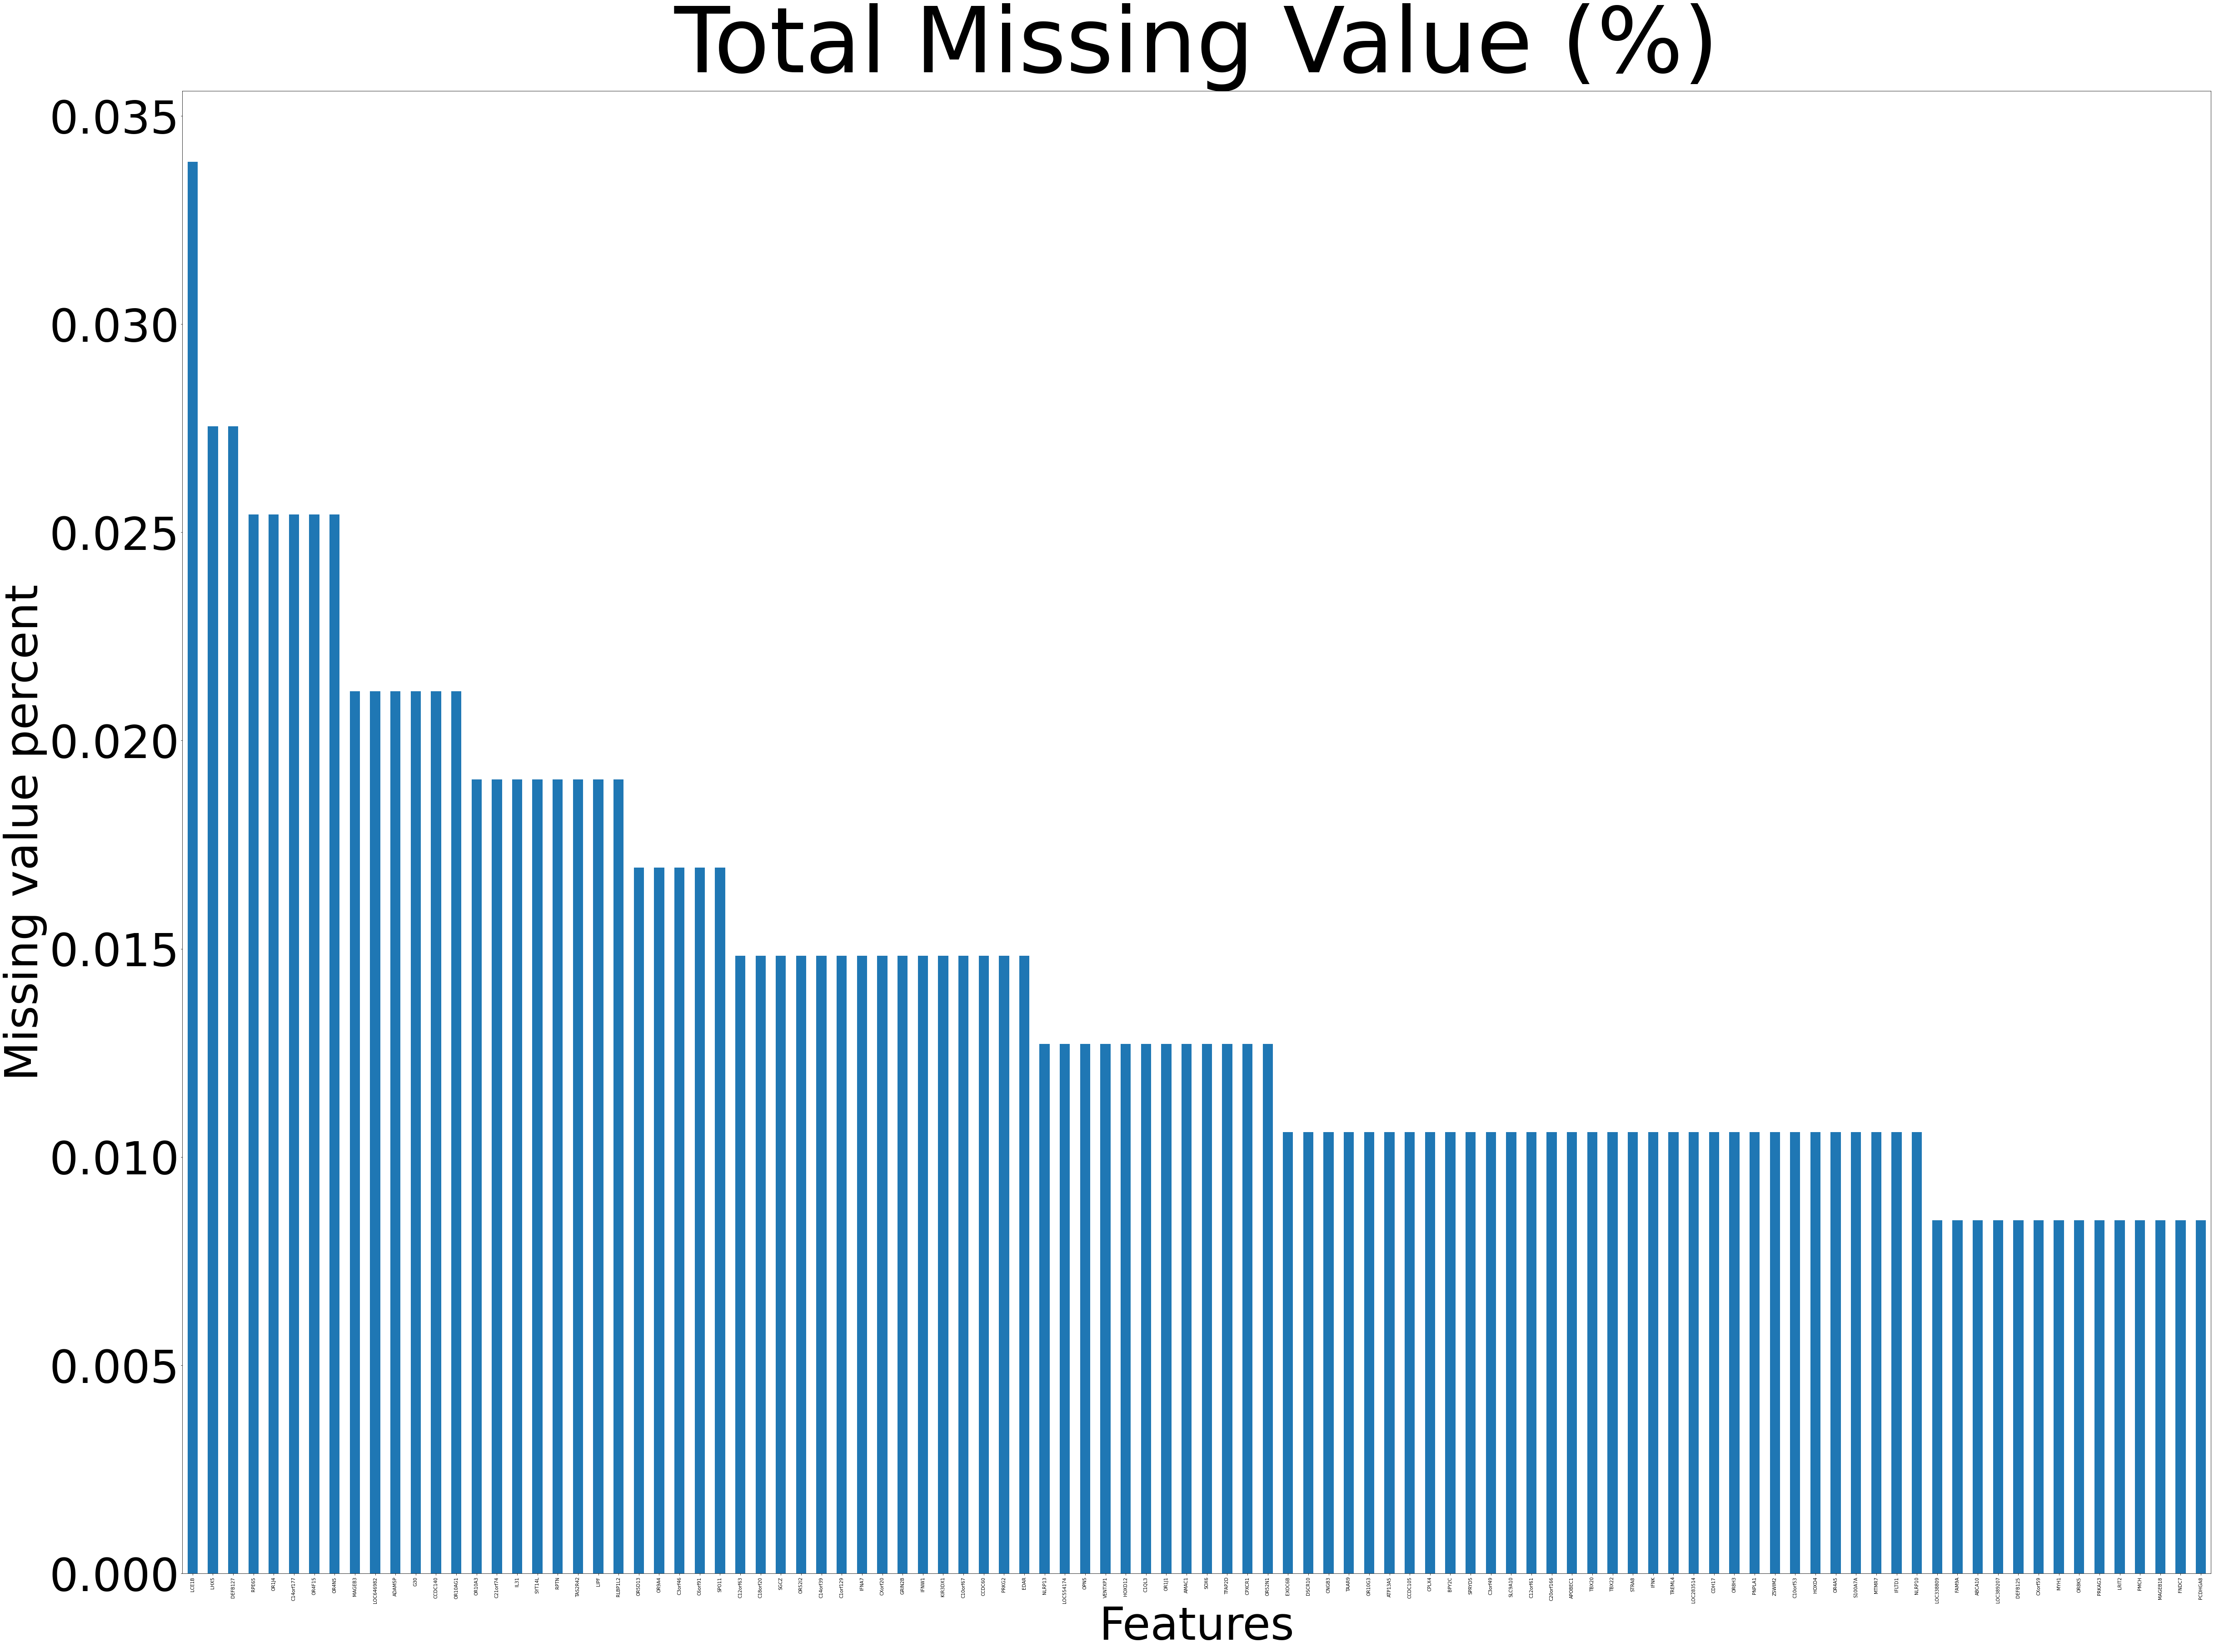

In [17]:
#결측치 유형 탐색
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(100)
percent_data.plot(kind="bar", figsize = (80,60))
plt.xticks(fontsize=10)
plt.yticks(fontsize=100)
plt.ylabel("Missing value percent", fontsize = 100)
plt.xlabel("Features", fontsize = 100)
plt.title("Total Missing Value (%)", fontsize = 200)

가장 높은 Missing Value percent가 0.03%이다.
hair et al.(2006)의 결측치 처리 가이드라인에 의하면 결측치 비율이 10%미만인경우 제거하거나 어떤 방법에 상관없이 imputation 한다고 하였다. 

In [1]:
#결측치 처리
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# random_state값은 원하시는 숫자 아무거나 넣으시면 됩니다.
imputer = IterativeImputer(random_state=42)
imputed_train_df = imputer.fit_transform(df_train)


NameError: ignored

In [ ]:
imputed_df.head()

<h2>Dimension Reduction</h2>

In [ ]:
dfs

<h2>Data Scaling</h2>

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print("모델의 정확도:", round(dtc.score(X_test_scaled,y_test),4))

<h2></h2>

<h2>Classifiers</h2>

*   Logistic Regression
*   Decision Tree
*   Support Vector Machine
*   Linear Discriminant Analysis
*   Quadratic Discriminant Analysis
*   Random Forest
*   K-Nearest Neighbors
*   Naive Bayes

<h2>Scoring</h2>


*   precision score
*   recall score
*   F1 score
*   support score
*   accuracy score
*   AUC/ROC




<h3>Trainset, testset split</h3>

<h2> Logiscic regression</h2>

In [ ]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

<h2>Decision Tree</h2>

In [ ]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

<h2>Support vector machine</h2>

In [ ]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

<h2>Linear Discriminant Analysis</h2>

In [ ]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

<h2>Quadratic Discriminant Analysis</h2>

In [ ]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

<h2>Random Forest Classifier</h2>

In [ ]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

<h2>K-Nearest Neighbors</h2>

In [ ]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

<h2>Naive Bayes</h2>

In [ ]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

<h2>Model Comparision</h2>

In [ ]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

<h2>Correlation</h2>

In [ ]:
correlation = df.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()